In [1]:
library(sitePath)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

PLOTS_DIR <- "Output"

In [2]:
plotOutDir <- file.path(PLOTS_DIR, "figure_method_parallel")
dir.create(plotOutDir, showWarnings = FALSE)

In [3]:
data(h3n2_align)
data(h3n2_tree)

paths <- addMSA(h3n2_tree, alignment = h3n2_align)

tree <- as.phylo(paths)
nNodes <- length(tree[["tip.label"]]) + tree[["Nnode"]]

The "tree" object is not bifurcated and resolved by "multi2di" function.



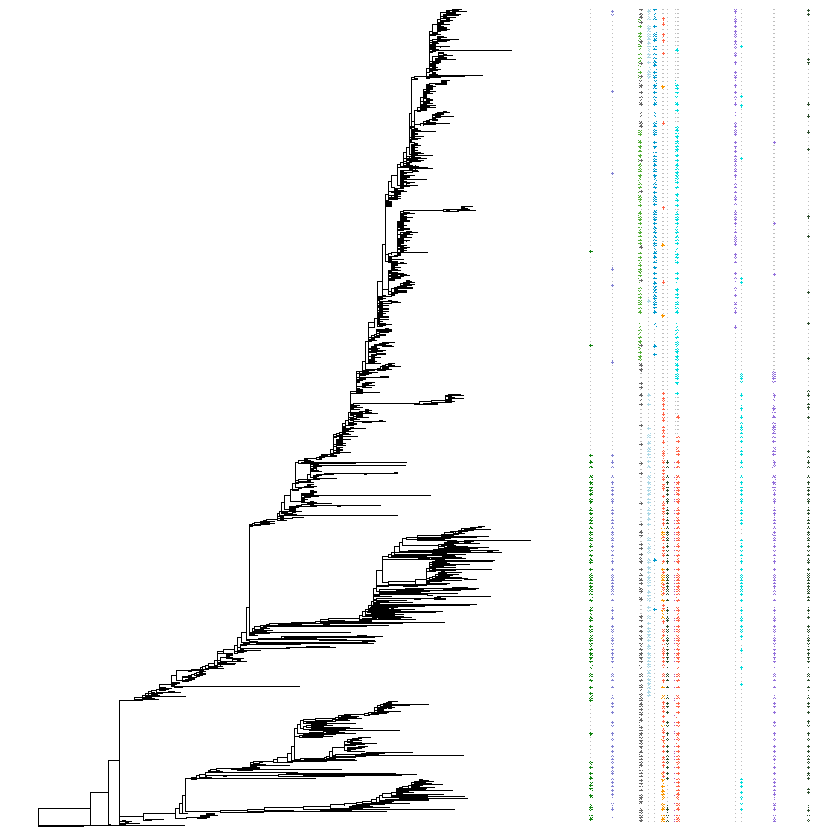

In [4]:
snp <- SNPsites(paths, minSNP = 600)

p <- plotMutSites(snp)
p

ggsave(
    filename = file.path(plotOutDir, "sparseMutations.svg"),
    plot = p, 
    device = "svg",
    width = 6,
    height = 6
)

In [5]:
pdf(file = file.path(PLOTS_DIR, "sneakPeek.pdf"))
sp <- sneakPeek(paths)
invisible(dev.off())

In [6]:
plotPathsComparison <- function(paths, select1, select2, pathSize = NULL) {
    if (is.null(pathSize)) {
        pathSize <- 6
    }
    
    pathNodes <- unique(unlist(paths[c(select1, select2)]))

    group <- rep(1, times = nNodes)
    group[pathNodes] <- 0
    group <- factor(group)

    groupColors <- rep(2, times = nNodes)
    groupColors[pathNodes] <- 1
    groupColors[unlist(paths[[select1]])] <- 0
    groupColors <- factor(groupColors)

    size <- rep(1, times = nNodes)
    size[pathNodes] <- 2

    p <- ggtree(tree, aes(color=groupColors, linetype=group, size=size)) + 
        scale_size(range=c(1, pathSize)) +
        scale_color_manual(values = c("red", "blue", "gainsboro")) + 
        theme(legend.position = "none")
    p
}

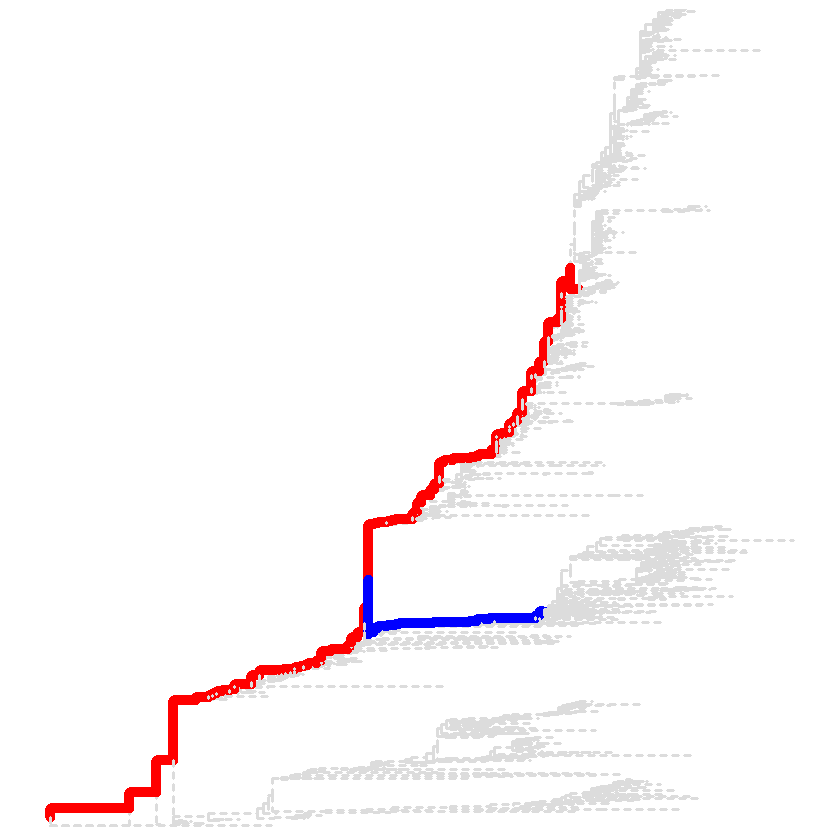

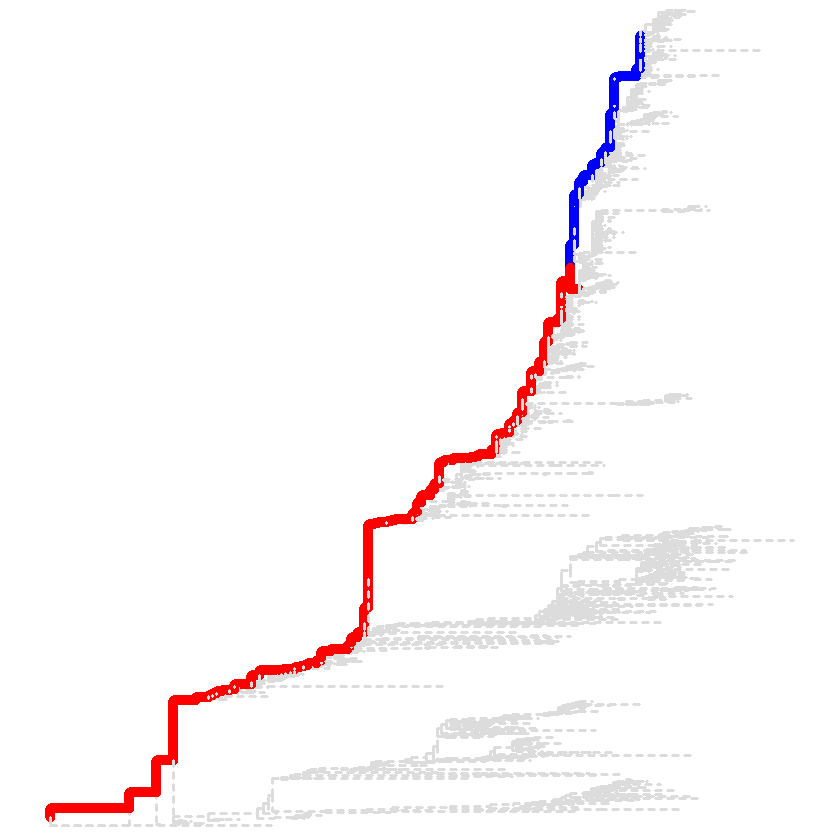

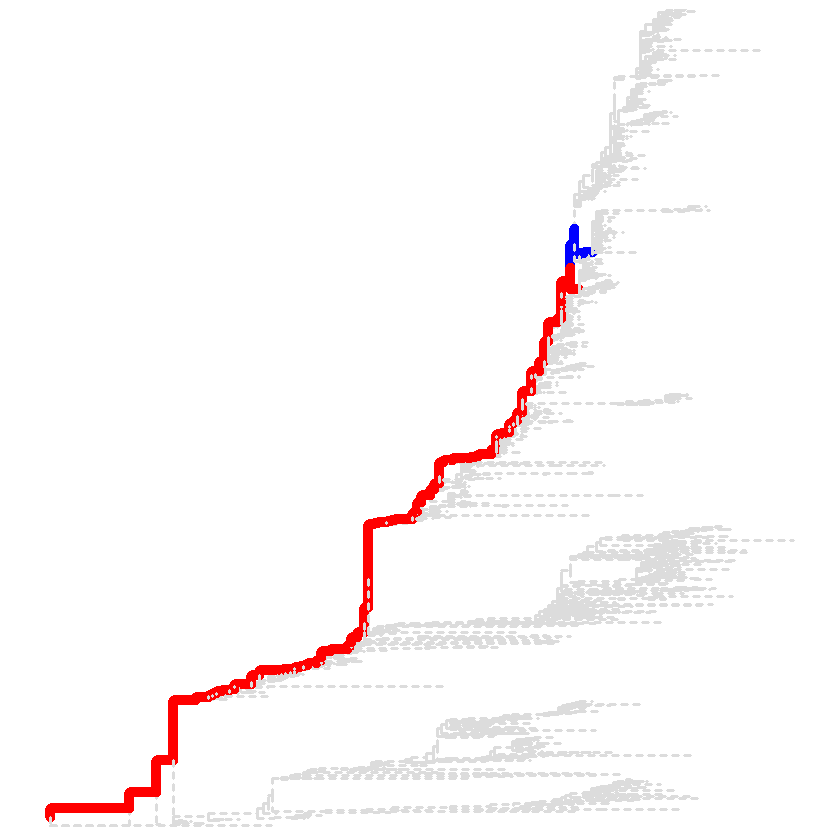

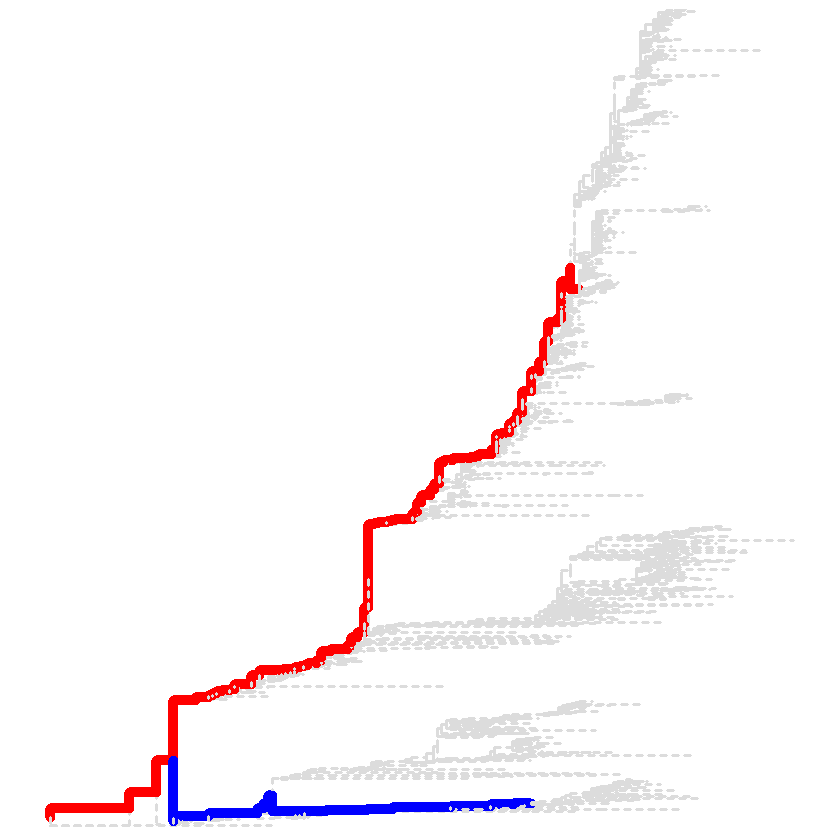

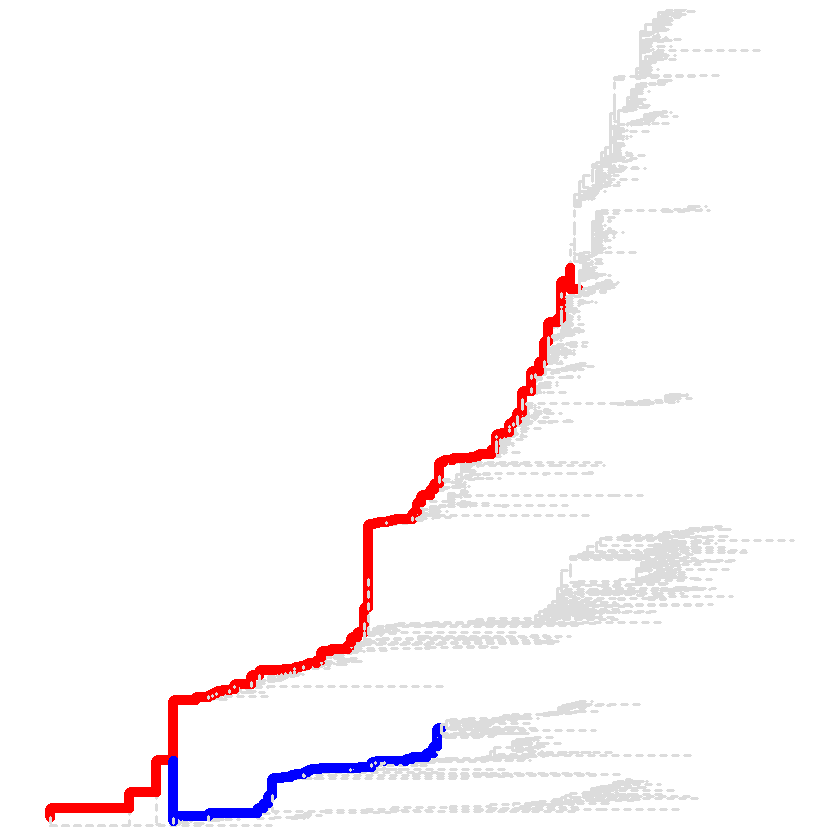

In [7]:
select1 <- 3
n <- 0

for (select2 in seq_along(paths)[-select1]) {
    n <- n + 1
    p <- plotPathsComparison(paths, select1, select2, 3)
    print(p)
    ggsave(
        filename = file.path(plotOutDir, paste0("pathComparison", n, ".svg")),
        plot = p, 
        device = "svg",
        width = 5,
        height = 6
    )
}

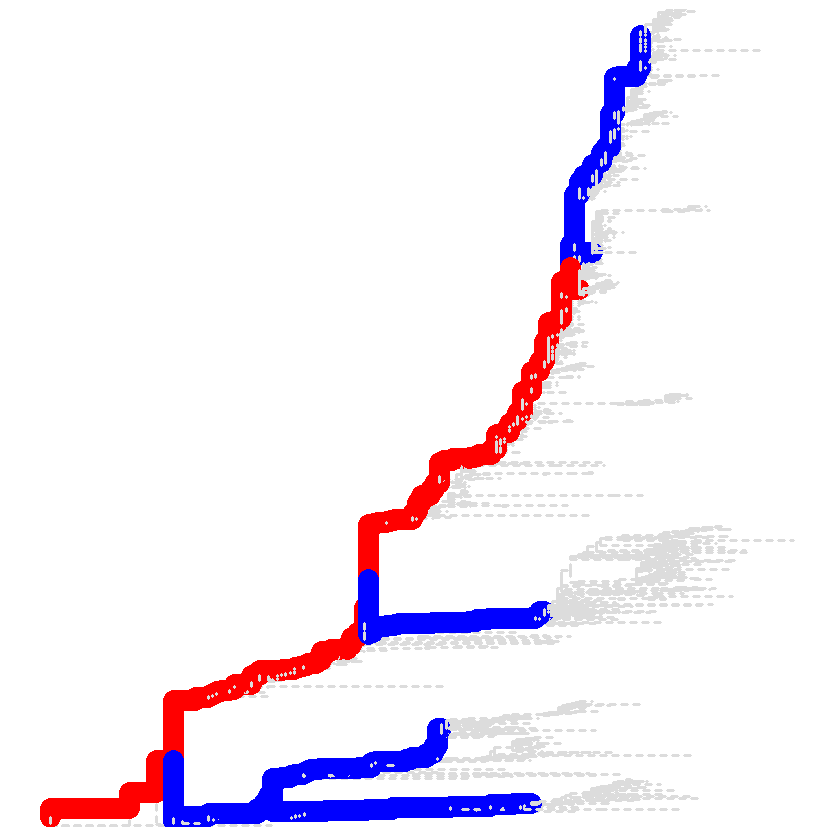

In [8]:
p <- plotPathsComparison(paths, select1, seq_along(paths)[-select1])
p

ggsave(
    filename = file.path(plotOutDir, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

In [9]:
minEntropy <- sitesMinEntropy(paths)

In [10]:
paraSites <- parallelSites(minEntropy, minSNP = 10, mutMode = "exact")

Warning message:
"`filter_()` was deprecated in dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


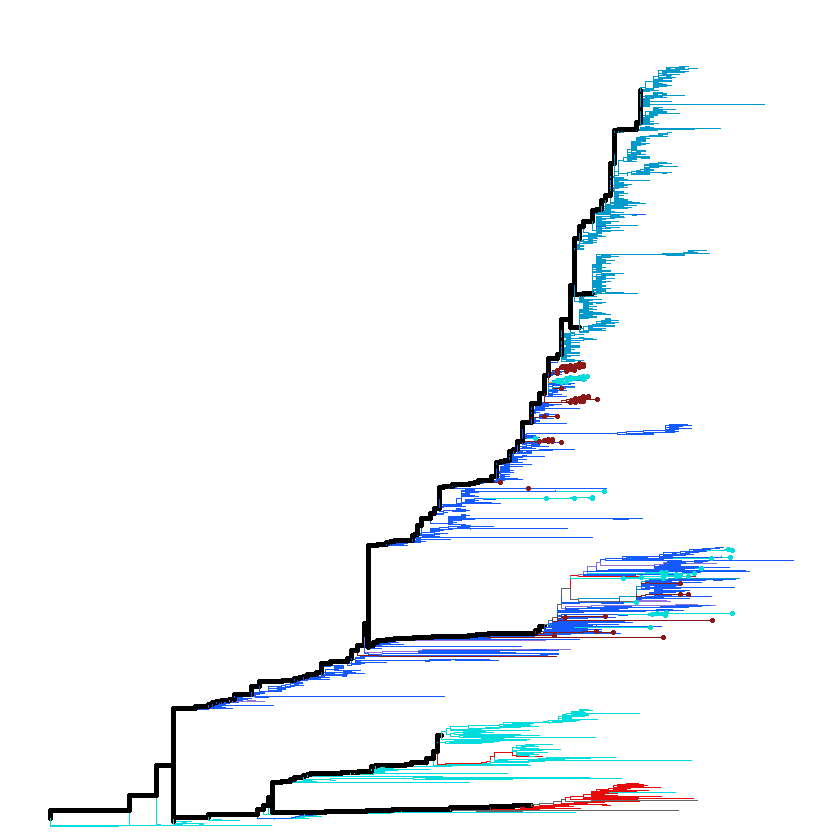

In [11]:
p <- plotSingleSite(paraSites, 192, showPath = TRUE) + 
    ggtitle(label = "", subtitle = "") +
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(plotOutDir, "mutations.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

In [12]:
allPathNodes <- table(unlist(paths))
mostRecentNodes <- as.integer(names(which(allPathNodes == 1)))

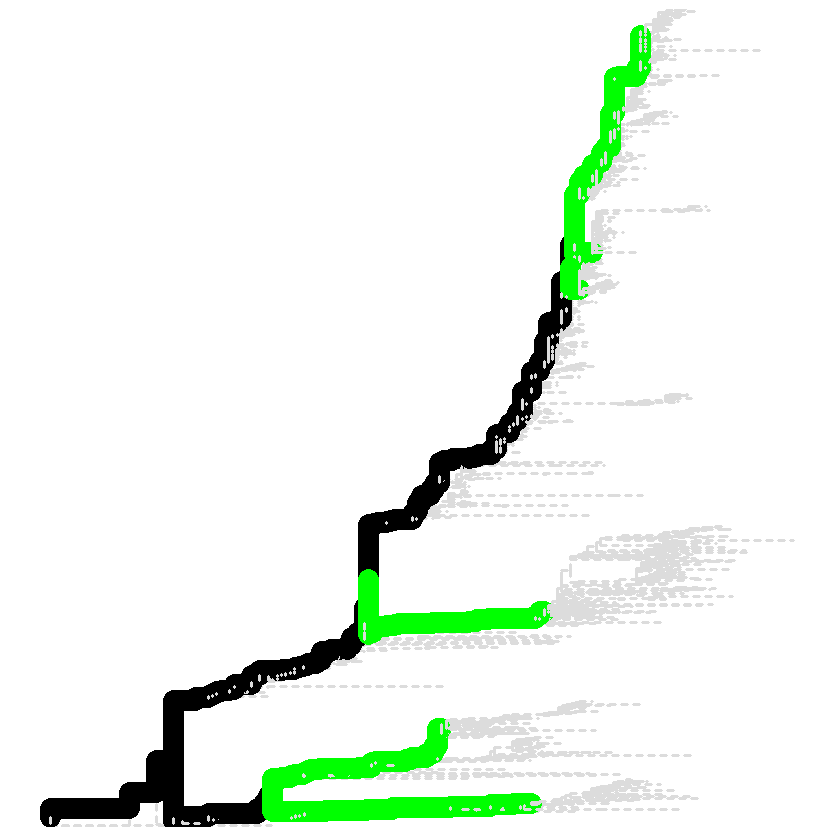

In [13]:
pathNodes <- unique(unlist(paths))

group <- rep(1, times = nNodes)
group[pathNodes] <- 0
group <- factor(group)

groupColors <- rep(2, times = nNodes)
groupColors[pathNodes] <- 1
groupColors[mostRecentNodes] <- 0
groupColors <- factor(groupColors)

size <- rep(1, times = nNodes)
size[pathNodes] <- 2

p <- ggtree(tree, aes(color=groupColors, linetype=group, size=size)) + 
    scale_size(range=c(1, 6)) +
    scale_color_manual(values = c("green", "black", "gainsboro")) + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(plotOutDir, "parallelity.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

In [14]:
plotSubPaths <- function(paths, select = NULL, pathColor = "blue", pathSize = 2) {
    tree <- as.phylo(paths)
    if (is.null(select)) {
        pathNodes <- unique(unlist(paths))
    } else {
        pathNodes <- unique(unlist(paths[select]))
    }
    group <- rep(1, times = nNodes)
    group[pathNodes] <- 0
    group <- factor(group)
    size <- rep(1, times = nNodes)
    size[pathNodes] <- 2
    p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
        scale_size(range=c(1, pathSize)) +
        scale_color_manual(values = c(pathColor, "gainsboro")) + 
        theme(legend.position = "none")
    p
}

In [15]:
plotOutDir <- file.path(PLOTS_DIR, "figure_method_fixation")
dir.create(plotOutDir, showWarnings = FALSE)

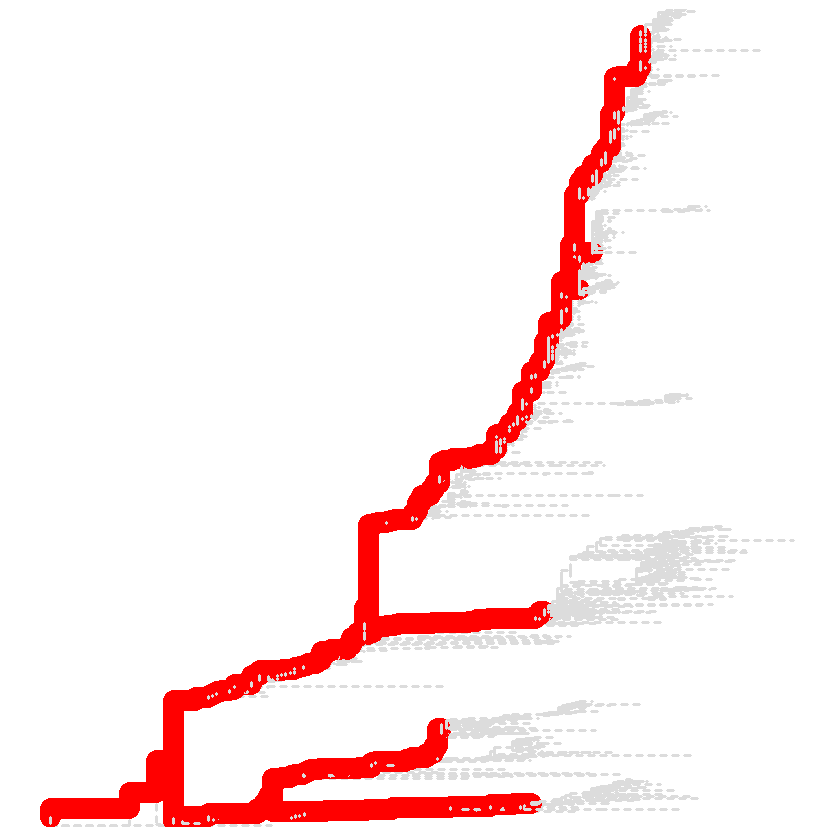

In [16]:
p <- plotSubPaths(paths, pathColor = "red", pathSize = 6)
p

ggsave(
    filename = file.path(plotOutDir, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

In [17]:
pathSelect <- list("0" = NULL, "1" = 2:3, "2" = c(1, 4), "3" = 2, "4" = 3)

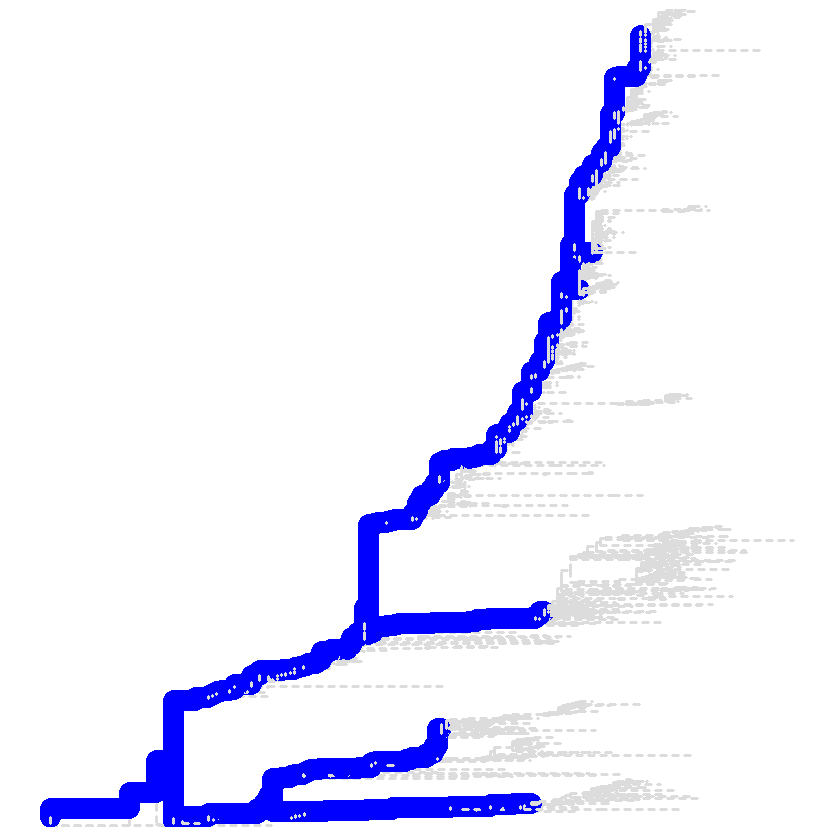

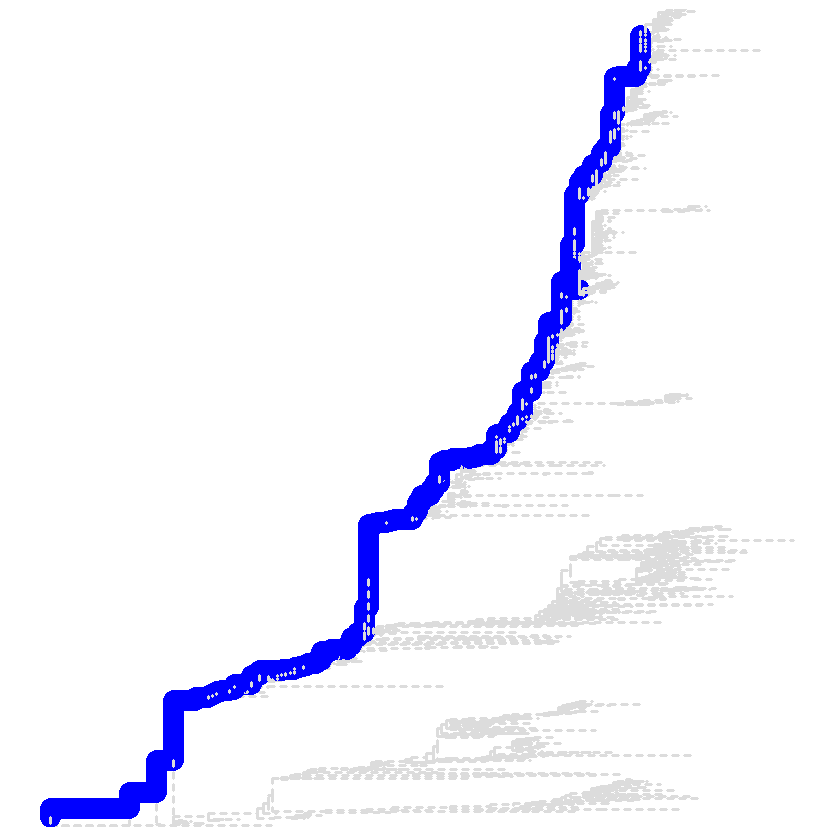

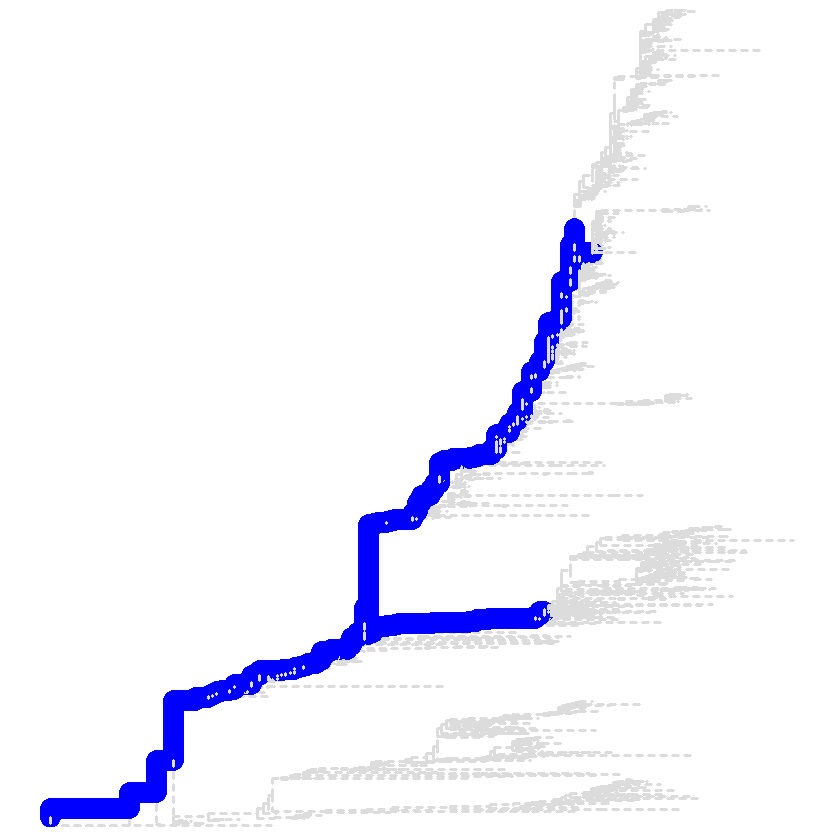

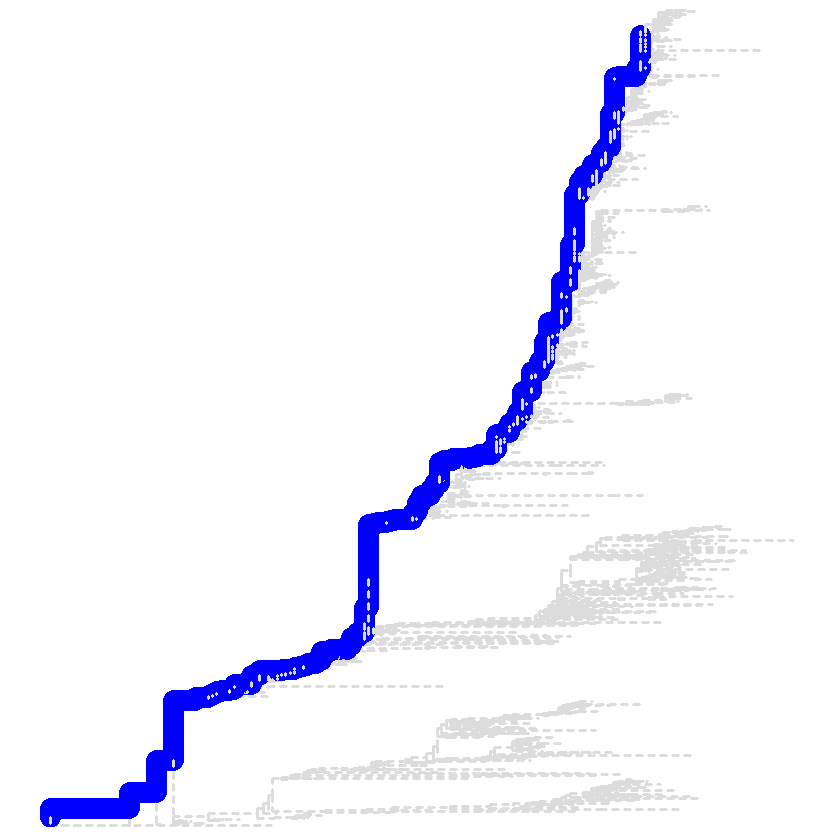

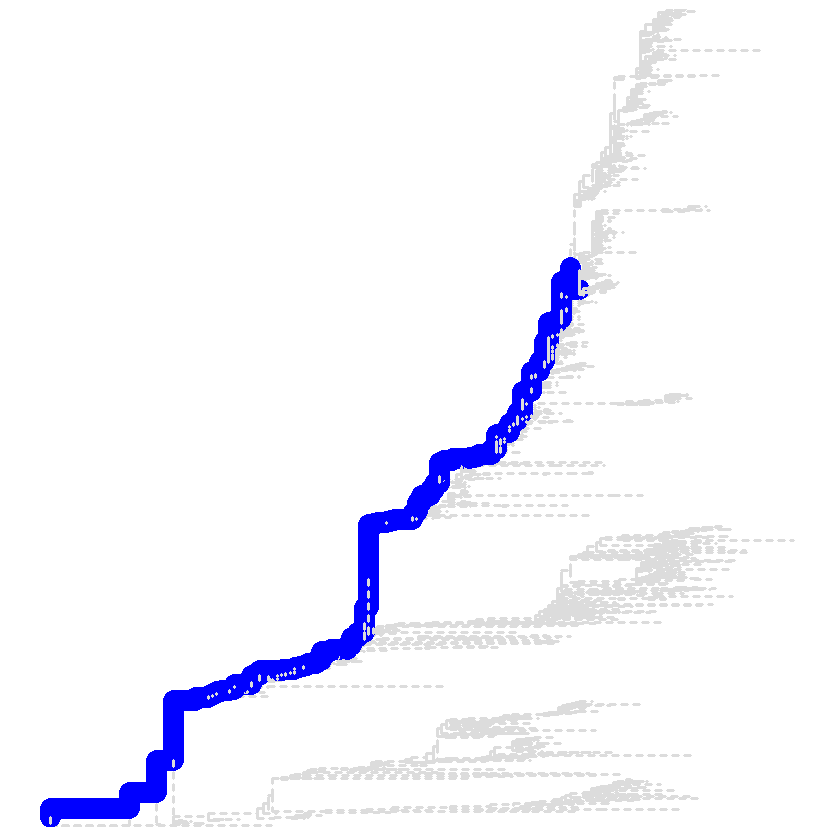

In [18]:
for (n in names(pathSelect)) {
    p <- plotSubPaths(paths, select = pathSelect[[n]], pathColor = "blue", pathSize = 6)
    print(p)

    ggsave(
        filename = file.path(plotOutDir, paste0("pathway", n, ".svg")),
        plot = p, 
        device = "svg",
        width = 10,
        height = 12
    )
}

In [19]:
mutations <- fixationSites(paths)

Warning message:
"`mutate_()` was deprecated in dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


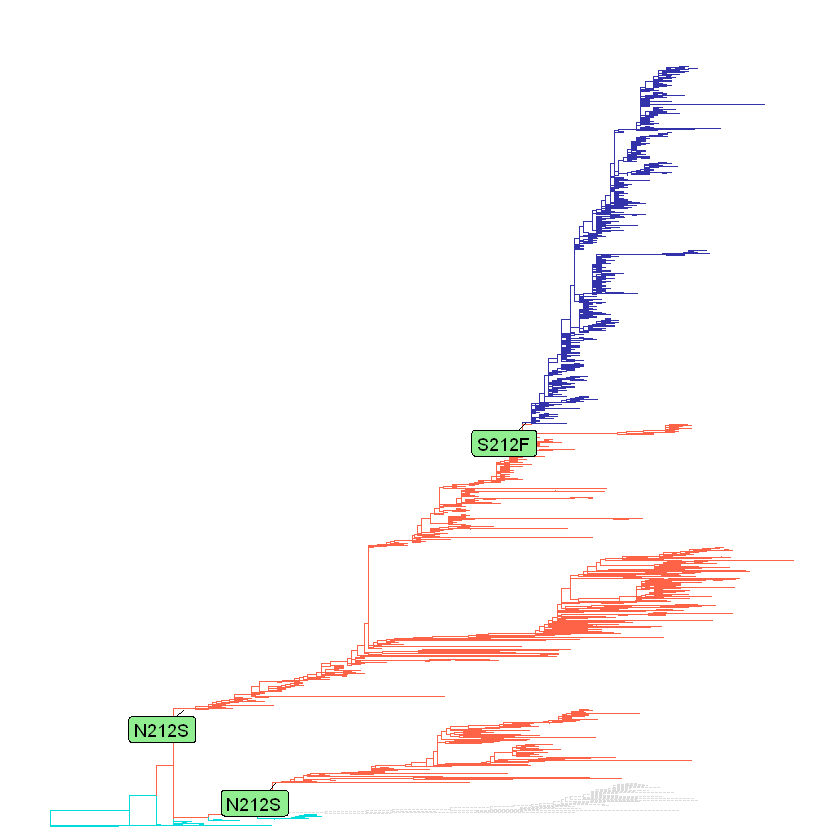

In [20]:
p <- plotSingleSite(mutations, 212) + 
    ggtitle(label = "", subtitle = "") + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(plotOutDir, "singleFixation.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

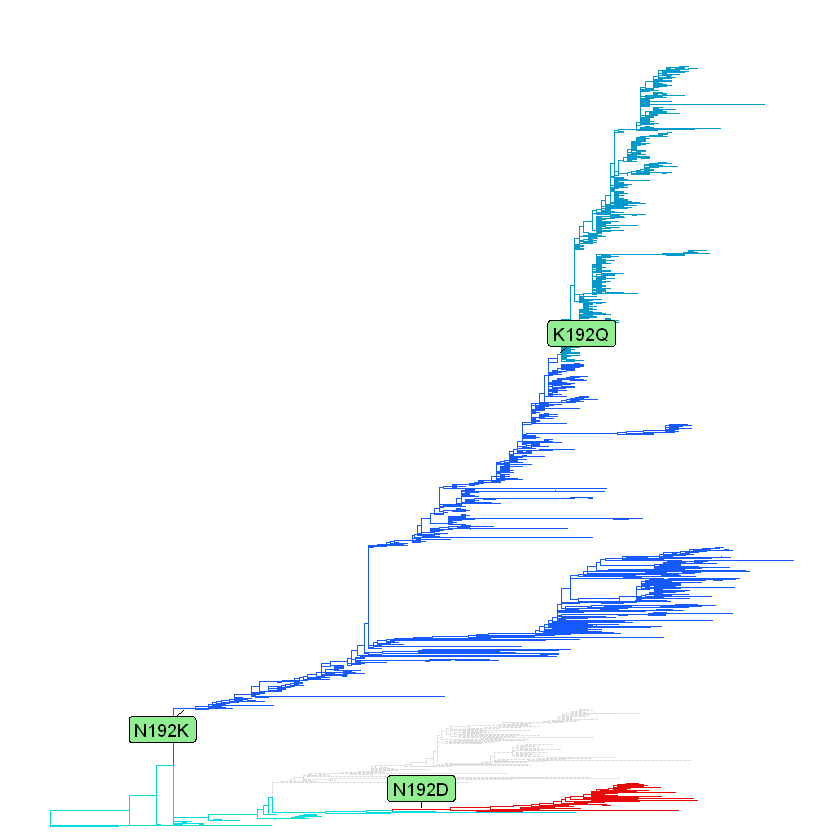

In [21]:
p <- plotSingleSite(mutations, 192) + 
    ggtitle(label = "", subtitle = "") + 
    theme(legend.position = "none")
p

ggsave(
    filename = file.path(plotOutDir, "multiFixation.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)